# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [30]:
# number of callbacks for black-sounding names
w_n = len(data[data.race == 'w'])
b_n = len(data[data.race == 'b'])
w_c = sum(data[data.race=='w'].call)
b_c = sum(data[data.race=='b'].call)
total_cb = sum(data.call)
total_resumes = len(data)
w_p = w_c/w_n
b_p = b_c/b_n

print('Number of White sounding names call-backs = ', w_c, '\nNumber of back sounding names call-backs = ', b_c, '\nTotal call-backs = ', total, '\nTotal Resumes submitted = ', total_resumes)
print('Proportions White = ', w_p, '\nProportions Black = ', b_p)

Number of White sounding names call-backs =  235.0 
Number of back sounding names call-backs =  157.0 
Total call-backs =  392.0 
Total Resumes submitted =  4870
Proportions White =  0.09650924024640657 
Proportions Black =  0.06447638603696099


In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


### 1. What test is appropriate for this problem? Does CLT apply?

For this problem because we are testing the proportion of call-backs we will use the z-score to test our hypothisis. 

To test for the CLT the data will have to satisfy these 4 criteria:

n1 * p1 >= 5
n2 * p2 >= 5 
n1 * (1-p1) >= 5 
n2 * (1-p2) >= 5

As shown below, our data satisfies all four of these criteria and thus or data is normaly distributed

In [22]:
r1 = w * w_p >= 5
r2 = b * b_p >= 5
r3 = w * (1-w_p) >= 5
r4 = b * (1-b_p) >= 5

r1,r2,r3,r4

(True, True, True, True)

### 2. What are the null and alternate hypotheses?

HO: There is no difference in the proportion of call-back rate for white vs black sounding names for people submiting resumes to companies

HA: There is a difference in the proportion of call-back rate for white and black sounding names for people submiting resumes to companies

### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [32]:
#Z Score

def ztest_proportions_two_samples(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1+1/n2))
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided
    return z, p

In [34]:
# 95% confidence interval
prop_diff = w_p - b_p
print('Observed difference in proportions: ', prop_diff)

z_crit = 1.96
p_hat1 = w_p*(1-w_p)/w_n
p_hat2 =  b_p*(1-b_p)/b_n
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

z_stat, p_val = ztest_proportions_two_samples(w_c, w_n, b_c, b_n)
print('z-stat: \t {}\np-value: \t {}'.format(z_stat, p_val))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
moe = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(moe))

Observed difference in proportions:  0.032032854209445585
z-stat: 	 4.108412152434346
p-value: 	 3.983886837577444e-05
95% conf int: 	 0.016777447859559147 - 0.047288260559332024
Margin of err: 	 +/-0.015255406349886438


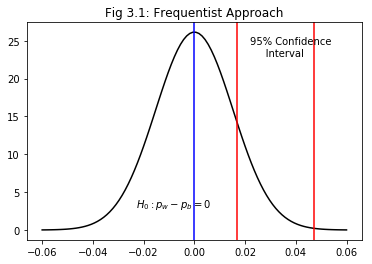

In [51]:
# Graph the Frequentist results
x = np.linspace(- 0.06, 0.06, 100, endpoint=True)
plt.plot(x, pdf, 'k-')
plt.figsize = (10, 8)

plt.axvline(ci_high, color='red')
plt.axvline(ci_low, color='red')
plt.axvline(0, color='blue')
plt.text(-0.023, 3, '$H_0: p_w - p_b = 0$')
plt.text(0.022, 23, '95% Confidence \n     Interval')
plt.title('Fig 3.1: Frequentist Approach');

In [53]:
# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(total_cb) + [False] * int(total_resumes-total_cb))

size = 10000

bs_reps_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=w_n))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=b_n))
    
    bs_reps_diff[i] = (w_bs_replicates - b_bs_replicates)/b_n
    
bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)

print('obs diff: {}\n'.format(prop_diff))
print('BOOTSTRAP RESULTS\np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: 0.032032854209445585

BOOTSTRAP RESULTS
p-value: 0.0001
95% conf. int.: [-0.01519507  0.01519507]


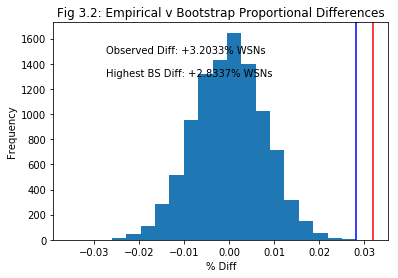

In [47]:
#Bootstrap Graph
_ = plt.hist(bs_reps_diff, bins=20)
_ = plt.axvline(prop_diff, color='red')
_ = plt.axvline(np.max(bs_reps_diff), color='blue')
_ = plt.xlabel('% Diff')
_ = plt.ylabel('Frequency')
_ = plt.title('Fig 3.2: Empirical v Bootstrap Proportional Differences')
_ = plt.text(-0.0275, 1300, 'Observed Diff: +{:0.5}% WSNs\n\nHighest BS Diff: +{:0.5}% WSNs'.format(prop_diff*100, np.max(bs_reps_diff)*100))

### Analysis

The p-value for both our aproaches, frequentist and bootstrap our p-values are 3.98e-5 and >0.001 respectfully, which are both well below the p = 0.05 threshold for statistical significance. We therefore reject the null hypthisis that there is no difference in the proportion of call-back rate for white vs black sounding names for people submiting resumes to companies.

### 4. Write a story describing the statistical significance in the context or the original problem.

We have shown in this study that there is a difference in the callback number baised on white or black sounding names. There is a ~50% increase in the call back numbers of resumes with white sounding names as compared to resuemes with black sounding names. 

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

This study shows that race/name is an important factor in callback sucess however we only analysed one factor in callback success. This study doesn't test for other factors such as varying education, work experience, etc. which could be more important factors in callback success than race/name.

If we were to test for all the factors that go into callback sucess we could compare all said factors and potentaily show that race/name is the most important factor in callback success. This single study shows that race/name is an important factor in callback success but not neccisarily the most important factor.